In [315]:
# Load libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

### Read Data

In [316]:
data = pd.read_csv("train.csv")

print('Dataframe Shape: ', data.shape); print('-'*80, '\n');
print("Dataframe Info: \n"); data.info(verbose=True); print('-'*80, '\n')
data.head(5)

Dataframe Shape:  (69999, 172)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float6

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

### Data Analysis

### Identify columns that have no variance

In [317]:
data_unique_count = data.nunique().sort_values(ascending=False)

# Find columns with all NULL entries
data_unique_count_is_zero = data_unique_count[data_unique_count == 0]
print(data_unique_count_is_zero.count())

0


In [318]:
# Find columns with all same entries
data_unique_count_is_one = data_unique_count[data_unique_count == 1]
print(data_unique_count_is_one.count())

13


In [319]:
data_unique_count_is_one

std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
circle_id               1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
last_date_of_month_8    1
last_date_of_month_7    1
last_date_of_month_6    1
loc_ic_t2o_mou          1
std_og_t2o_mou          1
loc_og_t2o_mou          1
std_ic_t2o_mou_6        1
dtype: int64

In [320]:
### Drop columns with single value in all rows

drop_no_varience_columns = list(data_unique_count_is_one.index)
data.drop(drop_no_varience_columns, axis=1, inplace=True)

In [321]:
data.shape

(69999, 159)

### Check for Missing values

In [322]:
# Check how many rows have all missing values
print("Rows with all NULL values =",  data.isnull().all(axis=1).sum())

Rows with all NULL values = 0


In [323]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    missing = round(100*(data.isnull().sum()/data.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [324]:
def imputeNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [325]:
# Missing values per column expressed as % of total number of values
getMissingValues(50)

There are 30 features having more than 50% missing values/entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8                   74.0
night_pck_user_6            75.0
night_pck_user_7            74.0
night_pck_user_8            74.0
fb_user_6                   75.0
fb_user_7                   74.0
fb_user_8                   74.0
dtype: flo

In [326]:
# Out the the above listed features, many are required and are essential for analysis. 
# We can choose to impute these values with 0 to make enable these features to give value to analysis.

imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user', 'date_of_last_rech_data']
imputeNan(data, imputeCol)

In [327]:
getMissingValues(50)

There are 0 features having more than 50% missing values/entries


Series([], dtype: float64)

In [328]:
getMissingValues(0)

There are 84 features having more than 0% missing values/entries


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_mou_6           4.0
s

In [329]:
imputeCol = ['onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
             'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
             'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
             'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'date_of_last_rech']
imputeNan(data, imputeCol)

In [330]:
getMissingValues(0)

There are 0 features having more than 0% missing values/entries


Series([], dtype: float64)

In [331]:
data.shape

(69999, 159)

In [332]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [333]:
date_vars = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", 
             "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"]

data.drop(date_vars, axis=1, inplace=True)

## Modelling Start

In [334]:
X = data[data.columns[~data.columns.isin(['churn_probability'])]]
Y = data['churn_probability']

In [335]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [336]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.7,test_size=0.3,random_state=42)

In [337]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (48999, 152)
Training dataset target size (48999,)
Test dataset size (21000, 152)
Test dataset target size (21000,)


In [338]:
print("Data imbalance, counts of label '1': {}".format(sum(y_train==1)))
print("Data imbalance, counts of label '0': {} \n".format(sum(y_train==0)))

Data imbalance, counts of label '1': 4977
Data imbalance, counts of label '0': 44022 



### Using SMOTE to correct data imbalance
## class weights giving better results - using class weights

In [339]:
sm = SMOTE(random_state=42)
#X_train_smote, y_train_smote= sm.fit_sample(X_train, y_train)
X_train_smote = X_train
y_train_smote = y_train

count_class_1 = y_train.value_counts()[0]
count_class_2 = y_train.value_counts()[1]
ratio = count_class_1/count_class_2

print('After update, the shape of train_X: {}'.format(X_train_smote.shape))
print('After update, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After update, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After update, counts of label '0': {}".format(sum(y_train_smote==0)))

After update, the shape of train_X: (48999, 152)
After update, the shape of train_y: (48999,) 

After update, counts of label '1': 4977
After update, counts of label '0': 44022


## PCA Start

In [340]:
# PCA object with default parameter
pca = PCA(random_state=42)

In [341]:
#Doing PCA on the train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [342]:
print(pca.components_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_)
print('-'*80, '\n');
print(pca.explained_variance_ratio_.cumsum())

[[ 1.44771578e-03  1.44571015e-01  1.49149073e-01 ...  1.13772307e-01
   1.12412853e-01  1.08354515e-01]
 [ 1.42710965e-04 -9.30102702e-02 -9.78322846e-02 ...  8.70320106e-02
   8.88431392e-02  8.69537259e-02]
 [ 2.55812437e-03 -4.93415963e-02 -6.41912626e-02 ...  4.70160439e-03
   4.64746766e-03  5.41389978e-03]
 ...
 [ 0.00000000e+00 -2.68377731e-17  2.24321582e-16 ... -6.65086208e-17
   3.90195095e-17 -1.67089724e-17]
 [-0.00000000e+00  2.17428112e-16 -4.81871621e-17 ...  1.40735918e-16
  -2.50391288e-16  6.41494352e-17]
 [-0.00000000e+00  1.08585188e-16  1.52773668e-16 ... -9.69407531e-17
   1.63645213e-16 -8.22921893e-17]]
-------------------------------------------------------------------------------- 

[1.24279355e-01 9.30322800e-02 6.28469878e-02 4.98141732e-02
 3.70300746e-02 2.97466624e-02 2.69318944e-02 2.43780223e-02
 2.19101577e-02 2.11174014e-02 2.06103607e-02 2.02011189e-02
 1.95996440e-02 1.70797774e-02 1.65812281e-02 1.59771571e-02
 1.47957932e-02 1.45684808e-02 1.4208

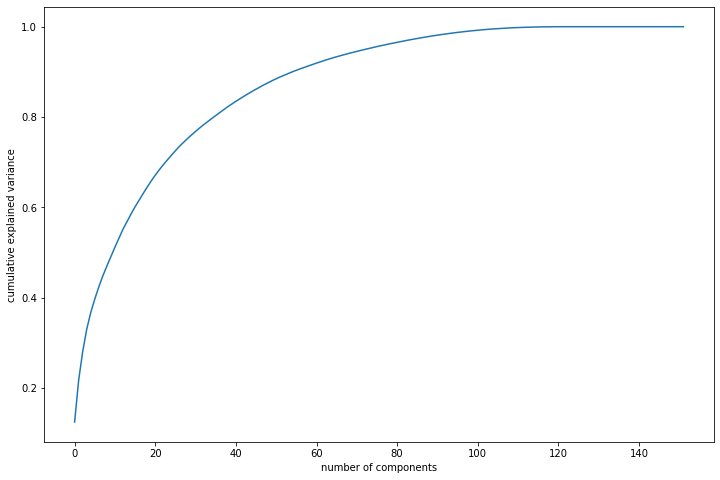

In [343]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [344]:
#pick the number of components explaining max variance
pca_X= PCA(n_components=70)

df_train_pca_X = pca_X.fit_transform(X_train_smote)
print(df_train_pca_X.shape)
df_test_pca_X = pca_X.transform(X_test)
print(df_test_pca_X.shape)

(48999, 70)
(21000, 70)


## Logistic Regression with PCA data

In [345]:
#Run the model using the selected variables
LR = LogisticRegression(class_weight='balanced')
LR.fit(df_train_pca_X, y_train_smote)

LogisticRegression(class_weight='balanced')

In [346]:
#Predicted probabilities
y_pred_train = LR.predict(df_train_pca_X)

#Printing results
print("Train data results")
print('-'*80, '\n');
print("Accuracy Score:",accuracy_score(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, y_pred_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote,y_pred_train))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_train_smote, y_pred_train)))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7854241923304557
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     44022
           1       0.30      0.85      0.45      4977

    accuracy                           0.79     48999
   macro avg       0.64      0.81      0.66     48999
weighted avg       0.91      0.79      0.82     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[34260  9762]
 [  752  4225]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.81


In [347]:
#Predicted probabilities
y_pred_test = LR.predict(df_test_pca_X)

#Printing results
print("Test data results");
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_test))
print('-'*80, '\n');
print("roc_auc_score: {:2.2}".format(metrics.roc_auc_score(y_test, y_pred_test)))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.7871428571428571
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.87      0.46      2155

    accuracy                           0.79     21000
   macro avg       0.65      0.82      0.66     21000
weighted avg       0.91      0.79      0.83     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[14652  4193]
 [  277  1878]]
-------------------------------------------------------------------------------- 

roc_auc_score: 0.82


## Trying Random Forest without PCA Data

In [348]:
#Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight = "balanced", random_state=42)

#fit
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [349]:
predictions_train = rfc.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("Accuracy Score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.9999795914202331
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00      4977

    accuracy                           1.00     48999
   macro avg       1.00      1.00      1.00     48999
weighted avg       1.00      1.00      1.00     48999

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[44022     0]
 [    1  4976]]


In [350]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("Classification Report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

Accuracy Score: 0.941047619047619
-------------------------------------------------------------------------------- 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18845
           1       0.79      0.58      0.67      2155

    accuracy                           0.94     21000
   macro avg       0.87      0.78      0.82     21000
weighted avg       0.94      0.94      0.94     21000

-------------------------------------------------------------------------------- 

Confusion Matrix:
[[18511   334]
 [  904  1251]]


In [351]:
importances = rfc.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.072577,loc_ic_mou_8
1,0.052272,total_ic_mou_8
2,0.049099,loc_ic_t2t_mou_8
3,0.048606,loc_ic_t2m_mou_8
4,0.043185,loc_og_mou_8
5,0.035946,total_og_mou_8
6,0.034988,offnet_mou_8
7,0.031589,roam_og_mou_8
8,0.031178,last_day_rch_amt_8
9,0.028441,loc_og_t2m_mou_8


In [352]:
# # model with the best hyperparameters
# using class weights to handle imbalance

rfc_updated = RandomForestClassifier(bootstrap=True,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100,
                             class_weight={1:ratio, 0:1},
                             random_state=42)

#fit
rfc_updated.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 1, 1: 8.845087402049428},
                       min_samples_leaf=100, min_samples_split=200,
                       random_state=42)

In [353]:
predictions_train = rfc_updated.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.9181411865548277
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     44022
           1       0.57      0.83      0.67      4977

    accuracy                           0.92     48999
   macro avg       0.77      0.88      0.81     48999
weighted avg       0.94      0.92      0.92     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[40866  3156]
 [  855  4122]]


In [354]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc_updated.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.911952380952381
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18845
           1       0.55      0.81      0.65      2155

    accuracy                           0.91     21000
   macro avg       0.76      0.87      0.80     21000
weighted avg       0.93      0.91      0.92     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[17407  1438]
 [  411  1744]]


In [355]:
importances = rfc_updated.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.123711,loc_ic_mou_8
1,0.078703,total_ic_mou_8
2,0.075511,loc_ic_t2m_mou_8
3,0.064832,loc_og_mou_8
4,0.063985,loc_ic_t2t_mou_8
5,0.055722,total_og_mou_8
6,0.044828,offnet_mou_8
7,0.040589,loc_og_t2t_mou_8
8,0.038747,loc_og_t2m_mou_8
9,0.036153,last_day_rch_amt_8


## Trying with XG Boost

In [356]:
from xgboost import XGBClassifier

#Running the random forest with default parameters.
xgb = XGBClassifier(random_state=42)

#fit
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [357]:
predictions_train = xgb.predict(X_train_smote)
print ("Train data results")
print('-'*80, '\n');
print("accuracy score:", accuracy_score(y_train_smote, predictions_train))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_train_smote, predictions_train))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_train_smote, predictions_train))

Train data results
-------------------------------------------------------------------------------- 

accuracy score: 0.975897467295251
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44022
           1       0.90      0.86      0.88      4977

    accuracy                           0.98     48999
   macro avg       0.94      0.92      0.93     48999
weighted avg       0.98      0.98      0.98     48999

-------------------------------------------------------------------------------- 

confusion matrix:
[[43562   460]
 [  721  4256]]


In [358]:
print ("Test data results")
print('-'*80, '\n');
predictions_test = rfc_updated.predict(X_test)
print("accuracy score:", accuracy_score(y_test, predictions_test))
print('-'*80, '\n');
print("classification report:")
print(classification_report(y_test, predictions_test))
print('-'*80, '\n');
print("confusion matrix:")
print(confusion_matrix(y_test, predictions_test))

Test data results
-------------------------------------------------------------------------------- 

accuracy score: 0.911952380952381
-------------------------------------------------------------------------------- 

classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     18845
           1       0.55      0.81      0.65      2155

    accuracy                           0.91     21000
   macro avg       0.76      0.87      0.80     21000
weighted avg       0.93      0.91      0.92     21000

-------------------------------------------------------------------------------- 

confusion matrix:
[[17407  1438]
 [  411  1744]]


In [359]:
importances = xgb.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head(15)

,value,colName
0,0.213371,total_ic_mou_8
1,0.164777,fb_user_8
2,0.061431,loc_ic_mou_8
3,0.019243,roam_og_mou_8
4,0.014165,spl_ic_mou_8
5,0.011756,last_day_rch_amt_8
6,0.008697,av_rech_amt_data_8
7,0.008363,offnet_mou_8
8,0.007947,std_og_mou_7
9,0.007652,total_rech_amt_8


### Evaluating Test Data

In [360]:
X_test.shape

(21000, 152)

In [361]:
test_data = pd.read_csv("test.csv")

print('Dataframe Shape: ', test_data.shape); print('-'*80, '\n');
test_data.head(5)

Dataframe Shape:  (30000, 171)
-------------------------------------------------------------------------------- 



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [362]:
drop_no_varience_columns = list(data_unique_count_is_one.index)
test_data.drop(drop_no_varience_columns, axis=1, inplace=True)

test_data.shape

(30000, 158)

In [363]:
test_data.drop(date_vars, axis=1, inplace=True)
test_data.shape

(30000, 152)

In [364]:
missing_values = pd.DataFrame((test_data.isnull().sum()/len(test_data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values.head(10)

,feature,Missing%
124,arpu_3g_6,74.716667
115,av_rech_amt_data_6,74.716667
106,max_rech_data_6,74.716667
127,arpu_2g_6,74.716667
109,count_rech_2g_6,74.716667
103,total_rech_data_6,74.716667
145,fb_user_6,74.716667
130,night_pck_user_6,74.716667
112,count_rech_3g_6,74.716667
104,total_rech_data_7,74.313333


In [365]:
def imputeTestNan(data, imputeColList=False, missingColList=False):
    # Function impute the nan with 0
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8'] for y in imputeColList]:
            test_data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            test_data[col].fillna(0, inplace=True)

In [366]:
imputeCol = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user', 
             'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou',
             'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou',
             'spl_og_mou', 'og_others', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
             'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others']
imputeTestNan(data, imputeCol)

In [367]:
solution_df = test_data[['id']].copy()
test_data = scaler.fit_transform(test_data)

In [368]:
predictions_test = rfc_updated.predict(test_data)

In [369]:
predictions_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [370]:
count_arr = np.bincount(predictions_test)
# Count occurrence of element '1' in numpy array
print('Total occurences of "1" in array: ', count_arr[1])
# Count occurrence of element '0' in numpy array
print('Total occurences of "0" in array: ', count_arr[0])

Total occurences of "1" in array:  3247
Total occurences of "0" in array:  26753


In [371]:
predictions_test.shape

(30000,)

In [372]:
test_data.shape

(30000, 152)

In [373]:
solution_df.insert(loc=1, column='churn_probability', value=predictions_test)

In [374]:
solution_df.head(10)

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
5,70004,1
6,70005,0
7,70006,0
8,70007,0
9,70008,1


In [375]:
solution_df.to_csv('solution.csv', index=False)